In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_ton = pd.read_csv('/content/drive/MyDrive/datasets/ton/NF-ToN-IoT.csv')
df_features = pd.read_csv('/content/drive/MyDrive/datasets/ton/NetFlow_v1_Features.csv')
df_ton.head()
df = df_ton

In [ ]:
df['L7_PROTO'].unique()

array([ 91.   ,   0.   ,  10.16 , 153.12 ,  91.178,  82.   ,   5.   ,
       154.   ,   8.   ,  12.   ,   7.   , 153.   ,   9.   ,   5.126,
         7.126,  91.126,   5.12 ,   5.178,   5.203,   5.22 ,   5.239,
        91.239,   5.219,  91.219,  68.   ,   9.178,   5.212,  91.212,
         5.169,   5.14 ,   9.169,   5.176,   7.178,  91.176,   7.22 ,
        81.   ,   5.125,  91.125,   7.212, 204.   ,   5.119,   5.124,
        10.   ,   5.147,   7.147,   5.221,  91.221, 154.87 ,  91.241,
        14.   ,  18.   ,  81.126,   7.239,  37.7  ,   7.219,   4.   ,
        91.169, 170.   ,  91.119, 170.178,  91.12 ,  91.22 ,   7.169,
        81.169,  81.219,  41.   ,  81.125,   5.233, 170.22 ,  91.161,
        91.147,  81.212,   7.125,  91.124, 102.   , 131.   , 127.   ,
        91.233,   5.7  ,   7.7  ,   7.221, 131.182, 206.   , 182.   ,
       206.12 ,  37.68 , 251.   , 131.222, 131.251, 103.   ,  81.178,
       178.   , 111.   ,   5.87 , 249.   ,   2.   ,   2.178])

In [ ]:
df.groupby(["L7_PROTO"])["L7_PROTO"].count().sort_values(ascending=False)

L7_PROTO
7.000      818118
91.000     345010
5.000       79448
7.178       51598
131.000     26574
            ...  
37.680          1
7.239           1
103.000         1
206.000         1
206.120         1
Name: L7_PROTO, Length: 97, dtype: int64

In [ ]:
null_values = df.isnull().sum()
print(f"Null or NaN values in the merged DataFrame:\n{null_values}")
df.describe()

Null or NaN values in the merged DataFrame:
IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06,1.379274e+06
mean,4.129073e+04,7.091114e+03,6.955538e+00,3.208614e+01,1.466229e+03,2.745434e+03,1.800829e+01,1.071157e+01,2.121593e+01,6.633697e+03,8.040426e-01
std,1.767886e+04,1.673668e+04,3.174542e+00,4.088253e+01,1.779632e+05,1.105589e+05,2.885741e+03,1.454466e+03,8.196017e+00,1.197320e+05,3.969361e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.662000e+04,8.000000e+01,6.000000e+00,7.000000e+00,1.120000e+02,6.000000e+01,2.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00
50%,4.552400e+04,8.000000e+01,6.000000e+00,7.000000e+00,4.580000e+02,6.960000e+02,4.000000e+00,4.000000e+00,2.600000e+01,9.400000e+01,1.000000e+00
75%,5.381000e+04,4.430000e+02,6.000000e+00,9.100000e+01,5.540000e+02,2.239000e+03,5.000000e+00,6.000000e+00,2.700000e+01,3.820000e+02,1.000000e+00
max,6.553500e+04,6.553400e+04,5.800000e+01,2.510000e+02,7.941590e+07,7.016518e+07,1.221043e+06,1.349068e+06,2.190000e+02,4.294849e+06,1.000000e+00


In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
print(f"Numeric Columns: {', '.join([str(y) for y in numeric_columns.columns])}\nData types:\n{numeric_columns.dtypes}")

Numeric Columns: L4_SRC_PORT, L4_DST_PORT, PROTOCOL, L7_PROTO, IN_BYTES, OUT_BYTES, IN_PKTS, OUT_PKTS, TCP_FLAGS, FLOW_DURATION_MILLISECONDS, Label
Data types:
L4_SRC_PORT                     int64
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
dtype: object


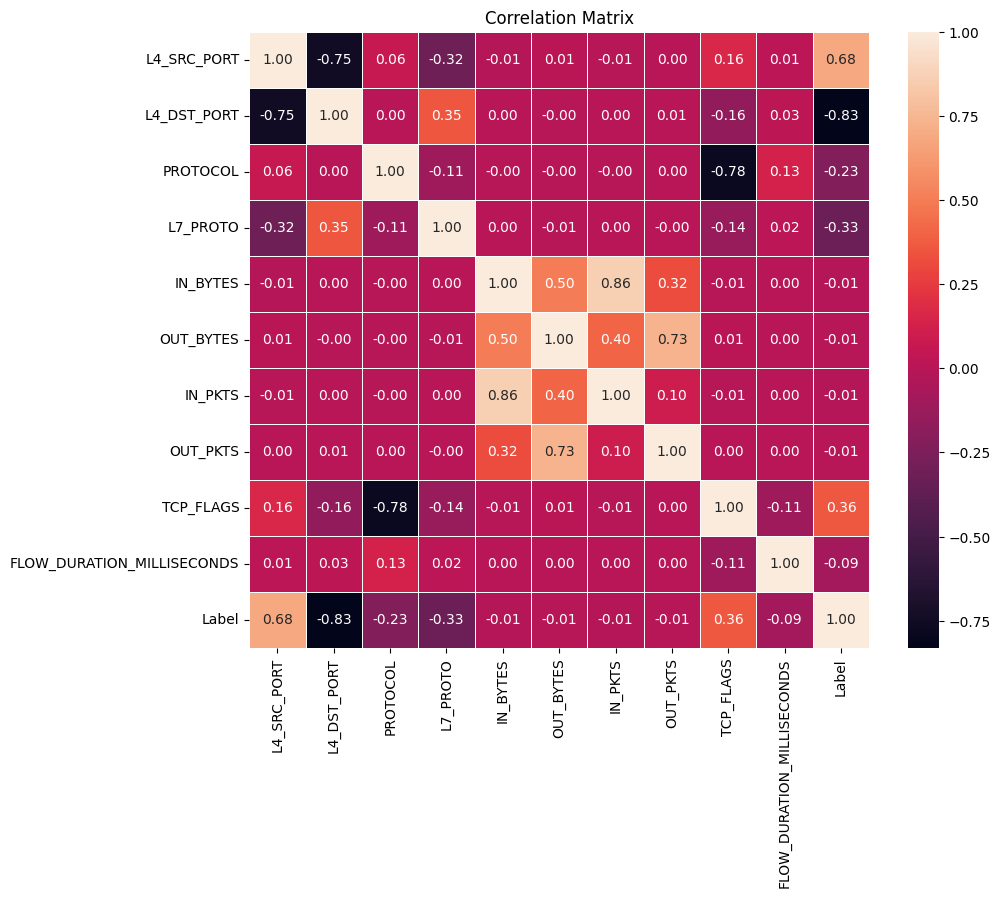

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("rocket")

corr = numeric_columns.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, cmap='rocket', annot=True, fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix")
plt.show()

In [ ]:
def transform_ip(ip_address):
    #split into octets
    octets = ip_address.split('.')
    #format to 3 digs
    formatted_octets = [f'{int(octet):03d}' for octet in octets]
    return ''.join(formatted_octets)

In [ ]:
df_c = df.copy(deep = True) # deep copy to ensure copy does not depend on the original (no altering the original dataframe)
print(f"Data check: {df_c == df}")
print(f"Memory check:{id(df_c) == id(df)}")

Data check:          IPV4_SRC_ADDR  L4_SRC_PORT  IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  \
0                 True         True           True         True      True   
1                 True         True           True         True      True   
2                 True         True           True         True      True   
3                 True         True           True         True      True   
4                 True         True           True         True      True   
...                ...          ...            ...          ...       ...   
1379269           True         True           True         True      True   
1379270           True         True           True         True      True   
1379271           True         True           True         True      True   
1379272           True         True           True         True      True   
1379273           True         True           True         True      True   

         L7_PROTO  IN_BYTES  OUT_BYTES  IN_PKTS  OUT_PKTS  TCP_

In [ ]:
df_c['IPV4_SRC_ADDR'], df_c["IPV4_DST_ADDR"] = df_c['IPV4_SRC_ADDR'].apply(transform_ip), df_c['IPV4_DST_ADDR'].apply(transform_ip)
df_c

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192168001195,63318,052139250253,443,6,91.00,181,165,2,1,24,327,0,Benign
1,192168001079,57442,192168001255,15600,17,0.00,63,0,1,0,0,0,0,Benign
2,192168001079,57452,239255255250,15600,17,0.00,63,0,1,0,0,0,0,Benign
3,192168001193,138,192168001255,138,17,10.16,472,0,2,0,0,0,0,Benign
4,192168001079,51989,192168001255,15600,17,0.00,63,0,1,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379269,192168001031,58032,192168001194,80,6,7.00,216,180,4,3,18,9433,1,ddos
1379270,192168001031,58034,192168001194,80,6,7.00,216,180,4,3,18,9221,1,ddos
1379271,192168001031,58036,192168001194,80,6,7.00,216,180,4,3,18,9656,1,ddos
1379272,192168001031,58038,192168001194,80,6,7.00,216,180,4,3,18,10046,1,ddos


In [ ]:
df_c.drop(columns=["Attack"],inplace=True) #label will be used to differentiate between malign and benign
df_c

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,192168001195,63318,052139250253,443,6,91.00,181,165,2,1,24,327,0
1,192168001079,57442,192168001255,15600,17,0.00,63,0,1,0,0,0,0
2,192168001079,57452,239255255250,15600,17,0.00,63,0,1,0,0,0,0
3,192168001193,138,192168001255,138,17,10.16,472,0,2,0,0,0,0
4,192168001079,51989,192168001255,15600,17,0.00,63,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379269,192168001031,58032,192168001194,80,6,7.00,216,180,4,3,18,9433,1
1379270,192168001031,58034,192168001194,80,6,7.00,216,180,4,3,18,9221,1
1379271,192168001031,58036,192168001194,80,6,7.00,216,180,4,3,18,9656,1
1379272,192168001031,58038,192168001194,80,6,7.00,216,180,4,3,18,10046,1


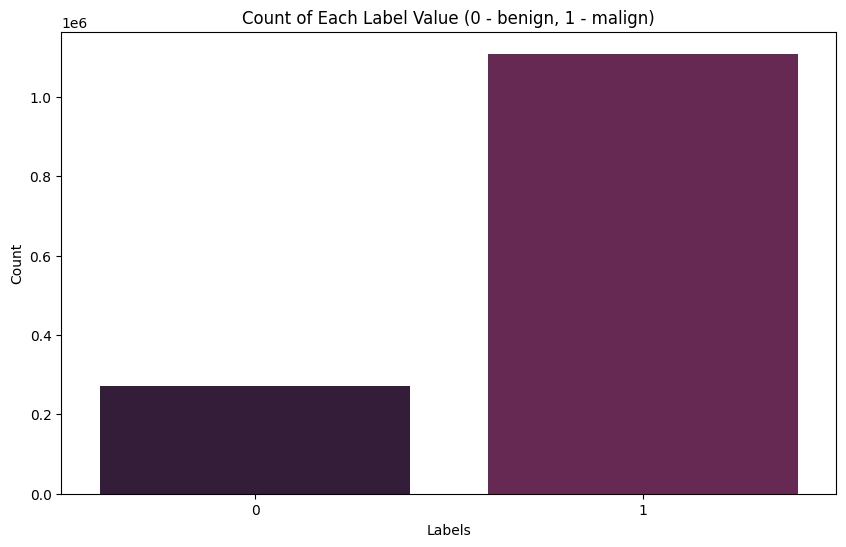

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df_c)
plt.title('Count of Each Label Value (0 - benign, 1 - malign)')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df_c.drop(['Label'], axis=1)
y = df_c['Label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)



print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

X

Training set size: 965491
Testing set size: 206892


,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
0,192168001195,63318,052139250253,443,6,91.00,181,165,2,1,24,327
1,192168001079,57442,192168001255,15600,17,0.00,63,0,1,0,0,0
2,192168001079,57452,239255255250,15600,17,0.00,63,0,1,0,0,0
3,192168001193,138,192168001255,138,17,10.16,472,0,2,0,0,0
4,192168001079,51989,192168001255,15600,17,0.00,63,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1379269,192168001031,58032,192168001194,80,6,7.00,216,180,4,3,18,9433
1379270,192168001031,58034,192168001194,80,6,7.00,216,180,4,3,18,9221
1379271,192168001031,58036,192168001194,80,6,7.00,216,180,4,3,18,9656
1379272,192168001031,58038,192168001194,80,6,7.00,216,180,4,3,18,10046


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
class_weight_dict

{0: 2.5515764158672267, 1: 0.6218575131135546}

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
!pip install joblib

In [ ]:
import joblib

scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)
#scaler = joblib.load(scaler_filename)

X_train.iloc[210138]

IPV4_SRC_ADDR                 192168001030
L4_SRC_PORT                          50892
IPV4_DST_ADDR                 192168001190
L4_DST_PORT                             80
PROTOCOL                                 6
L7_PROTO                               7.0
IN_BYTES                               216
OUT_BYTES                             2187
IN_PKTS                                  4
OUT_PKTS                                 5
TCP_FLAGS                               27
FLOW_DURATION_MILLISECONDS             288
Name: 150599, dtype: object

In [ ]:
criteria = {
    'IPV4_SRC_ADDR': '192.168.1.30',
    'L4_SRC_PORT': 50892,
    'IPV4_DST_ADDR': '192.168.1.190',
    'L4_DST_PORT': 80,
    'PROTOCOL': 6,
    'L7_PROTO': 7.0,
    'IN_BYTES': 216,
    'OUT_BYTES': 2187,
    'IN_PKTS': 4,
    'OUT_PKTS': 5,
    'TCP_FLAGS': 27,
    'FLOW_DURATION_MILLISECONDS': 288
}
conditions = [df[col] == value for col, value in criteria.items()]
mask = np.all(conditions, axis=0)
result = df[mask]
result

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
150598,192.168.1.30,50892,192.168.1.190,80,6,7.0,216,2187,4,5,27,288,1,injection
150599,192.168.1.30,50892,192.168.1.190,80,6,7.0,216,2187,4,5,27,288,1,ddos
150600,192.168.1.30,50892,192.168.1.190,80,6,7.0,216,2187,4,5,27,288,1,password


In [ ]:
X_train_scaled.shape[1]

12

In [ ]:
[(x) for x in X_train_scaled[210138]]

[0.872863186197902,
 0.7765621423666743,
 0.7528464046627528,
 0.0012208335240885715,
 0.08771929824561403,
 0.027888446215139442,
 2.6042784971096662e-06,
 3.1169308706206464e-05,
 2.456917943854511e-06,
 3.706262397447719e-06,
 0.1232876712328767,
 6.705707232081967e-05]

In [ ]:
y_train

814414     0
796911     0
1054636    1
553121     1
960232     1
          ..
65906      1
726471     1
413659     1
210138     1
569616     1
Name: Label, Length: 965491, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import accuracy_score, classification_report

"""model = Sequential([
    Dense(units=256, input_dim=X_train_scaled.shape[1]),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),
    Dense(units=256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),
    Dense(units=128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])"""

#model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
#model_checkpoint = ModelCheckpoint(filepath='nn.h5', save_best_only=True)

#model.fit(X_train_scaled, y_train, epochs=100, batch_size=256,
          #validation_data=(X_val_scaled, y_val),
          #callbacks=[early_stopping, reduce_lr, model_checkpoint], class_weight=class_weight_dict)

#model.save('nn.h5')

loaded_model = tf.keras.models.load_model('nn.h5')

y_pred_val_proba = loaded_model.predict(X_val_scaled)
y_pred_val = (y_pred_val_proba > 0.5).astype(int)

accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy_val:.2f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_val))

y_pred_test_proba = loaded_model.predict(X_test_scaled)
y_pred_test = (y_pred_test_proba > 0.5).astype(int)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

6466/6466 [==============================] - 12s 2ms/step
Validation Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     40542
           1       0.99      1.00      1.00    166349

    accuracy                           0.99    206891
   macro avg       0.99      0.98      0.99    206891
weighted avg       0.99      0.99      0.99    206891

6466/6466 [==============================] - 12s 2ms/step
Test Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     40542
           1       0.99      1.00      1.00    166350

    accuracy                           0.99    206892
   macro avg       0.99      0.98      0.99    206892
weighted avg       0.99      0.99      0.99    206892

